# Предсказание прибыли месторождений
## Постановка задачи: предсказать валовую прибыль месторождения по его координатам и характеристикам месторождения


In [1]:
import sys

import pandas as pd

sys.path.append('../')
from stable_gnn.graph import Graph
from stable_gnn.pipelines.node_classification_pipeline import TrainModelNC, TrainModelOptunaNC
import torch_geometric.transforms as T
import torch

## Загрузка данных

Данные oil_fields представляют собой граф месторождений, построенный по методу k ближайших соседей по координатам месторождений. Атрибутами вершин являются: закодированные название, страна, регион месторождения, тектонический режим, тип углеводорода, структурные свойства, литология, литологический период, проницаемость. В качестве метки вершины выступает валовая прибылность месторождения

In [2]:
root = '../data_validation/'
name='oil_fields'
adjust_flag = False
dataset = Graph(root=root + str(name), name=name, transform=T.NormalizeFeatures(),adjust_flag=False)
data = dataset[0]

## Решаем задачу предсказания связей, пользуясь подготовленным пайплайном в stable_gnn.pipelines.train_model_pipeline

In [3]:
results = pd.DataFrame(columns=['adjust_flag', 'ssl_flag','test accuracy'])

In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

loss_name='APP'
ssl_flag = False

optuna_training = TrainModelOptunaNC(data=dataset, device=device, ssl_flag=ssl_flag, loss_name=loss_name)
params = optuna_training.run(number_of_trials=10)
model_training = TrainModelNC(data=dataset, device=device, ssl_flag=ssl_flag, loss_name=loss_name)
model, train_acc_mi, train_acc_ma, test_acc_mi, test_acc_ma = model_training.run(params, plot_training_procces=True)
print(test_acc_mi)
results=results.append(pd.Series([adjust_flag,ssl_flag,test_acc_mi],index=results.columns), ignore_index=True)

In [5]:
torch.save(model,'model_nc.pt')

In [17]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

loss_name='APP'
ssl_flag = True

optuna_training = TrainModelOptunaNC(data=dataset, device=device, ssl_flag=ssl_flag, loss_name=loss_name)
params = optuna_training.run(number_of_trials=50) #{'hidden_layer': 128, "size of network, number of convs": 3, "dropout": 0.1, "lr": 0.01, "coef":10}
model_training = TrainModelNC(data=dataset, device=device, ssl_flag=ssl_flag, loss_name=loss_name)
model, train_acc_mi, train_acc_ma, test_acc_mi, test_acc_ma = model_training.run(params, plot_training_procces=False)
print(test_acc_mi)
results=results.append(pd.Series([adjust_flag,ssl_flag,test_acc_mi],index=results.columns), ignore_index=True)

[I 2023-01-09 16:50:45,502] A new study created in memory with name: no-name-958fcf9e-43c2-4bd9-8dce-2195b7dae13f
[I 2023-01-09 16:50:58,524] Trial 0 finished with value: 0.0 and parameters: {'hidden_layer': 128, 'dropout': 0.2, 'size of network, number of convs': 3, 'lr': 0.009896600368553585, 'coef': 2}. Best is trial 0 with value: 0.0.
[I 2023-01-09 16:51:07,618] Trial 1 finished with value: 0.20512820512820512 and parameters: {'hidden_layer': 256, 'dropout': 0.5, 'size of network, number of convs': 2, 'lr': 0.009688503894227738, 'coef': 2}. Best is trial 1 with value: 0.20512820512820512.
[I 2023-01-09 16:51:15,862] Trial 2 finished with value: 0.41025641025641024 and parameters: {'hidden_layer': 128, 'dropout': 0.0, 'size of network, number of convs': 2, 'lr': 0.009081009859485168, 'coef': 20}. Best is trial 2 with value: 0.41025641025641024.
[I 2023-01-09 16:51:24,534] Trial 3 finished with value: 0.41025641025641024 and parameters: {'hidden_layer': 32, 'dropout': 0.0, 'size of n

0.3875


C:\Users\User\AppData\Local\Temp\ipykernel_2140\1368860698.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(pd.Series([adjust_flag,ssl_flag,test_acc_mi],index=results.columns), ignore_index=True)


# Если уточнить структуру
Необходимо удалить папку processed и загрузить граф снова с флагом adjust_flag = True

In [19]:
root = '../data_validation/'
name='oil_fields'
adjust_flag = True
dataset = Graph(root=root + str(name), name=name, transform=T.NormalizeFeatures(),adjust_flag=True,number_of_trainig_epochs=120)
data = dataset[0]

Processing...
Done!


In [27]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

loss_name='APP'
ssl_flag = False

optuna_training = TrainModelOptunaNC(data=dataset, device=device, ssl_flag=ssl_flag, loss_name=loss_name)
params = optuna_training.run(number_of_trials=50)
model_training = TrainModelNC(data=dataset, device=device, ssl_flag=ssl_flag, loss_name=loss_name)
model, train_acc_mi, train_acc_ma, test_acc_mi, test_acc_ma = model_training.run(params, plot_training_procces=False)
print(test_acc_mi)
results=results.append(pd.Series([adjust_flag,ssl_flag,test_acc_mi],index=results.columns), ignore_index=True)

[I 2023-01-09 18:08:20,911] A new study created in memory with name: no-name-3b9c8bc9-acba-4175-972a-79e51d5fa88e
[I 2023-01-09 18:08:27,840] Trial 0 finished with value: 0.3333333333333333 and parameters: {'hidden_layer': 32, 'dropout': 0.1, 'size of network, number of convs': 2, 'lr': 0.008172476236190818, 'coef': 10}. Best is trial 0 with value: 0.3333333333333333.
[I 2023-01-09 18:08:37,667] Trial 1 finished with value: 0.3333333333333333 and parameters: {'hidden_layer': 128, 'dropout': 0.0, 'size of network, number of convs': 3, 'lr': 0.005996937217337082, 'coef': 0}. Best is trial 0 with value: 0.3333333333333333.
[I 2023-01-09 18:08:44,466] Trial 2 finished with value: 0.3333333333333333 and parameters: {'hidden_layer': 256, 'dropout': 0.4, 'size of network, number of convs': 2, 'lr': 0.006398287672758249, 'coef': 0}. Best is trial 0 with value: 0.3333333333333333.
[I 2023-01-09 18:08:51,035] Trial 3 finished with value: 0.358974358974359 and parameters: {'hidden_layer': 128, 'd

0.35


C:\Users\User\AppData\Local\Temp\ipykernel_2140\790929288.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(pd.Series([adjust_flag,ssl_flag,test_acc_mi],index=results.columns), ignore_index=True)


In [23]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

loss_name='APP'
ssl_flag = True
otuna_training = TrainModelOptunaNC(data=dataset, device=device, ssl_flag=ssl_flag, loss_name=loss_name)
params = otuna_training.run(number_of_trials=50) #{'hidden_layer': 128, "size of network, number of convs": 3, "dropout": 0.1, "lr": 0.01, "coef":10}
model_training = TrainModelNC(data=dataset, device=device, ssl_flag=ssl_flag, loss_name=loss_name)
model, train_acc_mi, train_acc_ma, test_acc_mi, test_acc_ma = model_training.run(params, plot_training_procces=False)
print(test_acc_mi)
results=results.append(pd.Series([adjust_flag,ssl_flag,test_acc_mi],index=results.columns), ignore_index=True)

[I 2023-01-09 17:51:28,904] A new study created in memory with name: no-name-8ae5bb77-b626-4208-a26b-7712d95f4edf
[I 2023-01-09 17:51:37,216] Trial 0 finished with value: 0.4358974358974359 and parameters: {'hidden_layer': 256, 'dropout': 0.5, 'size of network, number of convs': 2, 'lr': 0.005385034518740702, 'coef': 2}. Best is trial 0 with value: 0.4358974358974359.
[I 2023-01-09 17:51:47,437] Trial 1 finished with value: 0.46153846153846156 and parameters: {'hidden_layer': 32, 'dropout': 0.0, 'size of network, number of convs': 3, 'lr': 0.006868940881882232, 'coef': 10}. Best is trial 1 with value: 0.46153846153846156.
[I 2023-01-09 17:51:50,866] Trial 2 finished with value: 0.46153846153846156 and parameters: {'hidden_layer': 32, 'dropout': 0.2, 'size of network, number of convs': 1, 'lr': 0.00977992225566983, 'coef': 0}. Best is trial 1 with value: 0.46153846153846156.
[I 2023-01-09 17:51:57,399] Trial 3 finished with value: 0.0 and parameters: {'hidden_layer': 64, 'dropout': 0.1,

0.425


C:\Users\User\AppData\Local\Temp\ipykernel_2140\1954859578.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append(pd.Series([adjust_flag,ssl_flag,test_acc_mi],index=results.columns), ignore_index=True)


In [45]:
results # результат предсказания при разных конфигурациях включения уточнения структуры и самостоятельного обучения

,adjust_flag,ssl_flag,test accuracy
0,False,False,0.375
1,False,True,0.3875
2,True,False,0.375
3,True,True,0.425


# Построим объяснения предсказания

[I 2023-11-28 17:55:49,792] A new study created in memory with name: no-name-1cdbb78c-67f7-4afb-816a-b7a5b5f7d02b
[I 2023-11-28 17:56:00,245] Trial 0 finished with value: 1.849980354309082 and parameters: {'hidden_layer': 32, 'dropout': 0.2, 'size of network, number of convs': 3, 'lr': 0.007988341216325264, 'num_negative_samples': 6, 'alpha': 0.2}. Best is trial 0 with value: 1.849980354309082.
[I 2023-11-28 17:56:11,065] Trial 1 finished with value: 2.165956974029541 and parameters: {'hidden_layer': 32, 'dropout': 0.5, 'size of network, number of convs': 3, 'lr': 0.009647069276788644, 'num_negative_samples': 21, 'alpha': 0.6}. Best is trial 0 with value: 1.849980354309082.
[I 2023-11-28 17:56:22,674] Trial 2 finished with value: 1.9534106254577637 and parameters: {'hidden_layer': 32, 'dropout': 0.0, 'size of network, number of convs': 1, 'lr': 0.00529955834109134, 'num_negative_samples': 11, 'alpha': 0.4}. Best is trial 0 with value: 1.849980354309082.
[I 2023-11-28 17:56:34,755] Tria

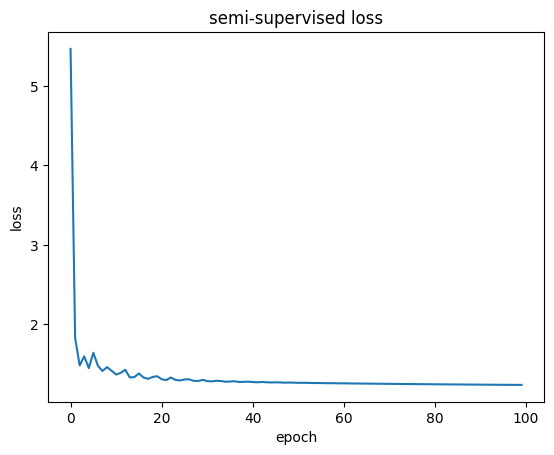

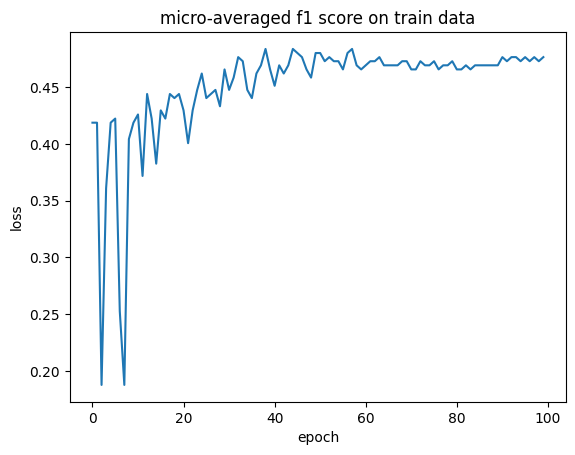

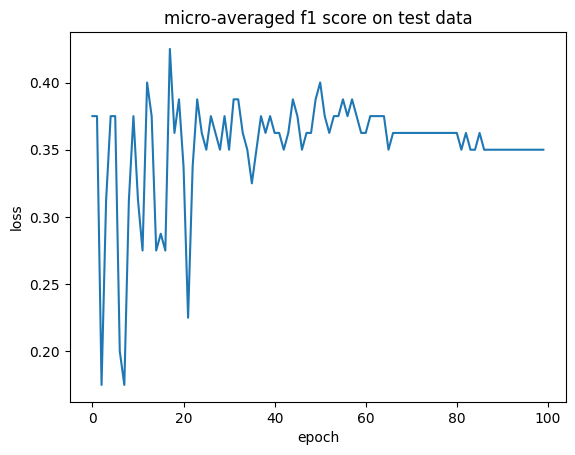

In [3]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

loss_name='APP'
ssl_flag=False
params={'hidden_layer': 256,
 'dropout': 0.0,
 'size of network, number of convs': 1,
 'lr': 0.00885530379164484,
 'coef': 0}
model_training = TrainModelNC(data=dataset, device=device, ssl_flag=ssl_flag, loss_name=loss_name)
model, train_acc_mi, train_acc_ma, test_acc_mi, test_acc_ma = model_training.run(params, plot_training_procces=True)

In [4]:
torch.save(model, '../data_validation/oil_fields/model.pt')

Explainer settings
\ A dim:  (396, 396)
\ X dim:  (396, 11)
Explaining node: 0
neighbors [  2   3  28  32  39  52  71  83  97 103 129 138 146 158 161 164 165 191
 198 204 216 230 245 274 279 292 303 331 334 335 367   0]
degree tensor([31., 33., 36., 23.,  7., 34., 26., 17., 19., 19., 14., 17., 29., 20.,
        29., 21., 18.,  4., 24., 28., 13.,  2.,  3., 35., 26., 15., 28., 13.,
        26., 12., 28., 27., 17., 18., 15., 14., 20., 13., 27., 36., 26., 15.,
        30.,  4., 29., 18., 15.,  3., 16., 21., 25.,  0., 39., 41.,  1., 24.,
        19., 21., 14., 24., 21., 29., 29., 10.,  5., 34., 26., 33.,  4., 18.,
        11., 35., 18., 19., 20.,  1., 17., 32., 27., 20., 21., 26., 25., 41.,
        27.,  5., 22.,  0., 30., 33., 25., 23., 40., 13., 25., 15., 13., 24.,
        29.,  6., 33.,  6., 22., 23., 25.,  2.,  7., 17., 28., 27., 19., 31.,
        33., 14., 32., 13., 21.,  6., 20., 22., 28., 36., 27.,  3., 16., 27.,
         8., 33., 13., 19., 12., 22., 23., 10., 46.,  4.,  2.,  7., 29.

  0%|          | 0/1000000 [00:00<?, ?it/s]

estimation [] []
explanations is 0 [] []


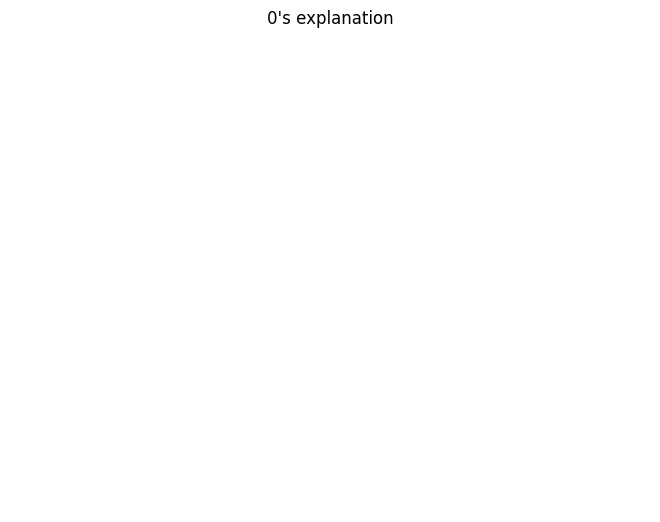

Explaining node: 7
neighbors [  7  15  24  90  91  96 141 172 183 186 199 331 338 367 383 391 395]
degree tensor([31., 33., 36., 23.,  7., 34., 26., 17., 19., 19., 14., 17., 29., 20.,
        29., 21., 18.,  4., 24., 28., 13.,  2.,  3., 35., 26., 15., 28., 13.,
        26., 12., 28., 27., 17., 18., 15., 14., 20., 13., 27., 36., 26., 15.,
        30.,  4., 29., 18., 15.,  3., 16., 21., 25.,  0., 39., 41.,  1., 24.,
        19., 21., 14., 24., 21., 29., 29., 10.,  5., 34., 26., 33.,  4., 18.,
        11., 35., 18., 19., 20.,  1., 17., 32., 27., 20., 21., 26., 25., 41.,
        27.,  5., 22.,  0., 30., 33., 25., 23., 40., 13., 25., 15., 13., 24.,
        29.,  6., 33.,  6., 22., 23., 25.,  2.,  7., 17., 28., 27., 19., 31.,
        33., 14., 32., 13., 21.,  6., 20., 22., 28., 36., 27.,  3., 16., 27.,
         8., 33., 13., 19., 12., 22., 23., 10., 46.,  4.,  2.,  7., 29., 26.,
        24., 14.,  5.,  5., 19., 17., 16., 28., 14.,  2., 16.,  2., 23.,  7.,
        15.,  4., 32., 23., 10., 22.

  0%|          | 0/1000000 [00:00<?, ?it/s]

estimation ['338'] []
explanations is 7 ['338', '7'] [('338', '7')]
0
1


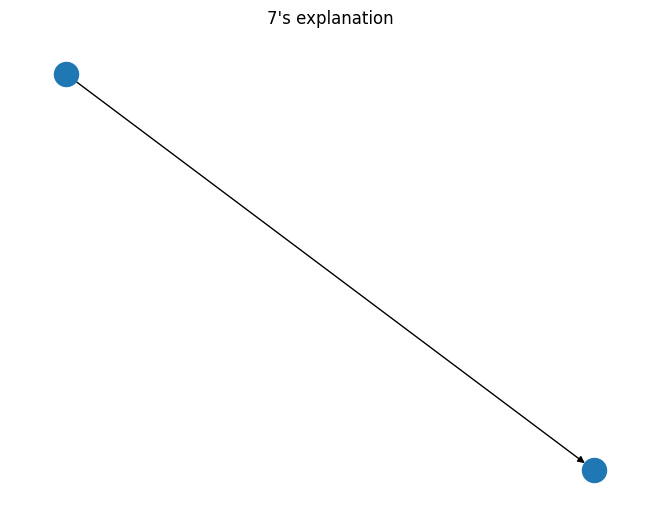

In [3]:
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from torch_geometric.utils import to_dense_adj

from stable_gnn.explain import Explain
model = torch.load('../data_validation/oil_fields/model.pt')
root='../data_validation/'
features = np.load(root + name + "/X.npy")
if os.path.exists(root + name + "/A.npy"):
    adj_matrix = np.load(root + name + "/A.npy")
else:
    adj_matrix = torch.squeeze(to_dense_adj(data.edge_index.cpu())).numpy()


explainer = Explain(model=model, adj_matrix=adj_matrix, features=features)

for global_node in [0,7]:
        pgm_explanation = explainer.structure_learning(global_node)
        print("explanations is", global_node, pgm_explanation.nodes, pgm_explanation.edges)
        g = nx.DiGraph()
        mapping = {}
        inv_mapping = {}
        for i, node in enumerate(pgm_explanation.nodes):
            mapping[node]=i
            inv_mapping[i]=node

        edges = []
        for edge in pgm_explanation.edges:
            edges.append([mapping[edge[0]], mapping[edge[1]]])
        g.add_edges_from(edges)
        for node in g.nodes():
            print(node)
            g.add_node(node)

        plt.figure()
        nx.draw(g)
        plt.title(str(global_node)+'\'s explanation' )
        plt.show()
        plt.close()

# Ego-networks of these nodes

In [ ]:
edges = data.edge_index.T.tolist()
G = nx.Graph()
G.add_edges_from(edges)
G.remove_edges_from(nx.selfloop_edges(G))

for global_node in [0,7]:
    g = nx.ego_graph(G,global_node)
    plt.figure()
    nx.draw(g)
    plt.title(str(global_node)+'\'s ego-network' )
    plt.show()
    plt.close()